In [18]:
import os
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from os.path import join
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import concatenate
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [3]:
dataset_path = join(os.curdir, "subsample")
processed_dataset_path = join(os.curdir, "subsample_processed")
if not os.path.isdir(processed_dataset_path):
    os.mkdir(processed_dataset_path)

class_labels = [
    "call", "dislike", "fist", "four", "like",
    "mute", "ok", "one", "palm", "peace",
    "peace_inverted", "rock", "stop", "stop_inverted",
    "three", "three2", "two_up", "two_up_inverted"
]


In [4]:
X = np.loadtxt(join(processed_dataset_path, f"X.csv"),
               delimiter=",",
               dtype=float)
y = np.loadtxt(join(processed_dataset_path, f"y.csv"),
               delimiter=",",
               dtype=float)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

y_train_OHE = to_categorical(y_train)
y_test_OHE = to_categorical(y_test)


In [5]:
def plot_loss_accuracy(history, title=None):
    # Create Subplots
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    if title is not None:
        # Set Figure Title
        fig.suptitle(title,
                    fontsize=14,
                    y=1.05)
    # Set Figure facecolor to White
    fig.set_facecolor('white')

    # Plot error vs iteration graph
    ax[0].plot(history['loss'],
               color='tab:blue',
               linewidth=1.5,
               label="Train Loss")
    ax[0].plot(history['val_loss'],
               color='tab:orange',
               linewidth=1.5,
               label="Test Loss")
    # Set title for the subplot
    ax[0].set_title(f"Loss vs epoch", size=12, y=1.01)
    # Set labels for the x and y axis
    ax[0].set_xlabel('Epoch', size=10)
    ax[0].set_ylabel('Loss', size=10)
    # Show plot legends
    ax[0].legend()
    # Turn on grid
    ax[0].grid(linestyle='dashed')

    # Plot accuracy vs iteration graph
    ax[1].plot(history['accuracy'],
               color='tab:blue',
               linewidth=1.5,
               label="Train Accuracy")
    ax[1].plot(history['val_accuracy'],
               color='tab:orange',
               linewidth=1.5,
               label="Test Accuracy")
    # Set title for the subplot
    ax[1].set_title(f"Accuracy vs epoch", size=12, y=1.01)
    # Set labels for the x and y axis
    ax[1].set_xlabel('Epoch', size=10)
    ax[1].set_ylabel('Accuracy', size=10)
    # Show plot legends
    ax[1].legend()
    # Turn on grid
    ax[1].grid(linestyle='dashed')

    # Show plot
    plt.show()

# Classical ML

In [6]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

print(clf)

y_pred = clf.predict(X_train)
print("Train accuracy:", accuracy_score(y_train, y_pred))

y_pred = clf.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))


LogisticRegression()
Train accuracy: 0.5764611689351481
Test accuracy: 0.5175718849840255


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.49      0.89      0.63        19
         1.0       0.31      0.92      0.46        12
         2.0       0.47      0.44      0.46        18
         3.0       0.27      0.15      0.19        20
         4.0       0.33      0.14      0.20        21
         5.0       0.31      0.53      0.39        17
         6.0       1.00      0.45      0.62        22
         7.0       0.83      0.48      0.61        21
         8.0       0.25      0.38      0.30        16
         9.0       0.25      0.25      0.25        16
        10.0       0.55      0.71      0.62        17
        11.0       1.00      0.47      0.64        19
        12.0       0.67      0.53      0.59        19
        13.0       0.90      0.82      0.86        11
        14.0       0.74      0.85      0.79        20
        15.0       0.74      0.82      0.78        17
        16.0       0.78      0.58      0.67        12
        17.0       0.43    

In [14]:
clf = RandomForestClassifier(max_depth=15, random_state=0)
clf.fit(X_train, y_train)

print(clf)

y_pred = clf.predict(X_train)
print("Train accuracy:", accuracy_score(y_train, y_pred))

y_pred = clf.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))


RandomForestClassifier(max_depth=15, random_state=0)
Train accuracy: 1.0
Test accuracy: 0.5431309904153354


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85        19
         1.0       0.38      0.67      0.48        12
         2.0       0.54      0.39      0.45        18
         3.0       0.33      0.30      0.32        20
         4.0       0.68      0.71      0.70        21
         5.0       0.58      0.65      0.61        17
         6.0       0.74      0.64      0.68        22
         7.0       0.58      0.52      0.55        21
         8.0       0.35      0.38      0.36        16
         9.0       0.25      0.19      0.21        16
        10.0       0.62      0.47      0.53        17
        11.0       0.52      0.58      0.55        19
        12.0       0.53      0.42      0.47        19
        13.0       0.80      0.73      0.76        11
        14.0       0.55      0.60      0.57        20
        15.0       0.59      0.59      0.59        17
        16.0       0.33      0.58      0.42        12
        17.0       0.62    

# Vanilla DNN

Epoch 1/500
125/125 [==============================] - 3s 5ms/step - loss: 2.8821 - accuracy: 0.0697 - val_loss: 2.8778 - val_accuracy: 0.0895
Epoch 2/500
125/125 [==============================] - 0s 3ms/step - loss: 2.8370 - accuracy: 0.0985 - val_loss: 2.8644 - val_accuracy: 0.0767
Epoch 3/500
125/125 [==============================] - 0s 3ms/step - loss: 2.7953 - accuracy: 0.1137 - val_loss: 2.8590 - val_accuracy: 0.0703
Epoch 4/500
125/125 [==============================] - 0s 3ms/step - loss: 2.7553 - accuracy: 0.1321 - val_loss: 2.8298 - val_accuracy: 0.0927
Epoch 5/500
125/125 [==============================] - 0s 3ms/step - loss: 2.6990 - accuracy: 0.1705 - val_loss: 2.7575 - val_accuracy: 0.1182
Epoch 6/500
125/125 [==============================] - 0s 3ms/step - loss: 2.6177 - accuracy: 0.1737 - val_loss: 2.6906 - val_accuracy: 0.1310
Epoch 7/500
125/125 [==============================] - 0s 3ms/step - loss: 2.5224 - accuracy: 0.1898 - val_loss: 2.6006 - val_accuracy: 0.1502

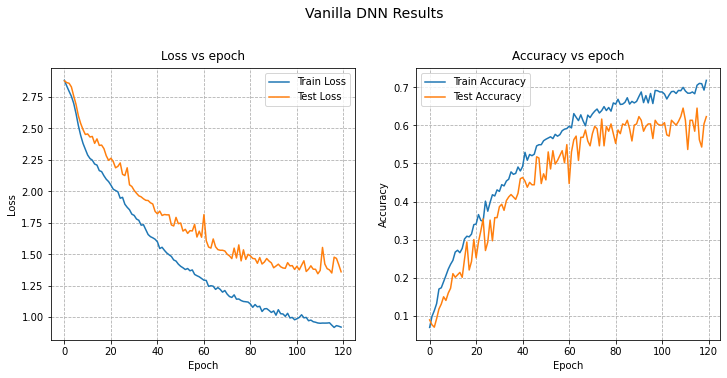

In [10]:
def DNN():
    model = Sequential()
    model.add(Dense(32, input_shape=(63,), activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(128, activation='relu'))
    # model.add(Dense(256, activation='relu'))
    model.add(Dense(18, activation='softmax'))
    
    return model

model = DNN()
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              metrics=['accuracy'])

history = model.fit(X_train, y_train_OHE,
                    validation_data=(X_test, y_test_OHE),
                    epochs=500, 
                    batch_size=10, 
                    verbose=1,
                    callbacks=[EarlyStopping(monitor='val_loss', 
                                             mode='min', 
                                             verbose=1,
                                             patience=10,
                                             restore_best_weights=True)])

plot_loss_accuracy(history.history, title="Vanilla DNN Results")


In [16]:

model.save('dnnModel.h5')

In [19]:
model = load_model('dnnModel.h5')
y_pred = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [20]:
print(classification_report(y_test, y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

         0.0       0.88      0.79      0.83        19
         1.0       0.44      0.58      0.50        12
         2.0       0.75      0.50      0.60        18
         3.0       0.55      0.55      0.55        20
         4.0       0.48      0.67      0.56        21
         5.0       0.72      0.76      0.74        17
         6.0       0.82      0.82      0.82        22
         7.0       0.76      0.76      0.76        21
         8.0       0.59      0.62      0.61        16
         9.0       0.25      0.31      0.28        16
        10.0       0.53      0.53      0.53        17
        11.0       0.92      0.63      0.75        19
        12.0       0.50      0.42      0.46        19
        13.0       0.83      0.91      0.87        11
        14.0       0.94      0.80      0.86        20
        15.0       0.68      0.88      0.77        17
        16.0       0.57      0.67      0.62        12
        17.0       0.60    

# CNN

Epoch 1/500
125/125 [==============================] - 7s 6ms/step - loss: 2.8688 - accuracy: 0.0633 - val_loss: 2.8701 - val_accuracy: 0.0735
Epoch 2/500
125/125 [==============================] - 1s 5ms/step - loss: 2.7740 - accuracy: 0.1257 - val_loss: 2.6818 - val_accuracy: 0.1470
Epoch 3/500
125/125 [==============================] - 1s 4ms/step - loss: 2.3894 - accuracy: 0.1954 - val_loss: 2.3714 - val_accuracy: 0.1917
Epoch 4/500
125/125 [==============================] - 1s 4ms/step - loss: 2.1844 - accuracy: 0.2554 - val_loss: 2.2369 - val_accuracy: 0.2332
Epoch 5/500
125/125 [==============================] - 1s 5ms/step - loss: 2.0000 - accuracy: 0.3267 - val_loss: 2.1315 - val_accuracy: 0.2907
Epoch 6/500
125/125 [==============================] - 0s 4ms/step - loss: 1.8112 - accuracy: 0.4011 - val_loss: 1.9997 - val_accuracy: 0.3450
Epoch 7/500
125/125 [==============================] - 1s 4ms/step - loss: 1.7039 - accuracy: 0.4235 - val_loss: 1.8269 - val_accuracy: 0.4569

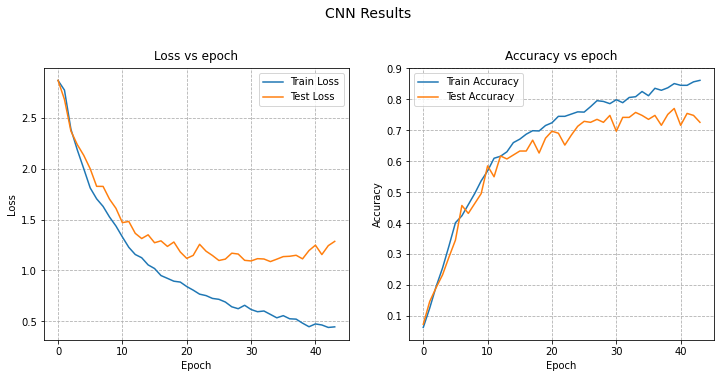

In [21]:
def CNN():
    model = Sequential()
    model.add(Conv1D(32, 3, activation='relu', input_shape=(21, 3)))
    # model.add(MaxPooling1D(2))
    model.add(Conv1D(64, 3, activation='relu'))
    # model.add(MaxPooling1D(2))
    # model.add(Conv1D(64, 3, activation='relu'))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(18, activation='softmax'))

    return model


model = CNN()
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model.fit(X_train.reshape(-1, 21, 3), y_train_OHE,
                    validation_data=(X_test.reshape(-1, 21, 3), y_test_OHE),
                    epochs=500,
                    batch_size=10,
                    verbose=1,
                    callbacks=[EarlyStopping(monitor='val_loss',
                                             mode='min',
                                             verbose=1,
                                             patience=10,
                                             restore_best_weights=True)])

plot_loss_accuracy(history.history, title="CNN Results")


In [22]:
model.save('cnnModel.h5')

In [23]:
model = load_model('cnnModel.h5')
y_pred = model.predict(X_test.reshape(-1, 21, 3))
print(classification_report(y_test, y_pred.argmax(axis=1)))

10/10 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        19
         1.0       0.50      0.75      0.60        12
         2.0       0.89      0.44      0.59        18
         3.0       0.81      0.65      0.72        20
         4.0       0.94      0.76      0.84        21
         5.0       0.67      0.71      0.69        17
         6.0       0.64      0.95      0.76        22
         7.0       0.84      0.76      0.80        21
         8.0       0.69      0.56      0.62        16
         9.0       0.38      0.81      0.52        16
        10.0       0.86      0.71      0.77        17
        11.0       0.93      0.68      0.79        19
        12.0       0.88      0.74      0.80        19
        13.0       0.67      0.91      0.77        11
        14.0       0.90      0.90      0.90        20
        15.0       1.00      0.88      0.94        17
        16.0       1.00     